In [6]:

import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random


!pip install opencv-python

현재폴더에있는 digit 0~9 까지 bmp를 불러와서 img_digits에다가 추가를 해줍니다.

In [7]:
def load_digits():

    img_digits = []



    for i in range(10):

        filename = './digits/digit{}.bmp'.format(i)

        img_digits.append(cv2.imread(filename, cv2.IMREAD_GRAYSCALE))


        if img_digits[i] is None:

            return None



    return img_digits

In [8]:
def find_digit(img, img_digits):#부분

    max_idx = -1

    max_ccoeff = -1


    # 최대 NCC 찾기

    for i in range(10):

        img = cv2.resize(img, (100, 150))

        #부분영상을 100x150으로 리사이즈

        res = cv2.matchTemplate(img, img_digits[i], cv2.TM_CCOEFF_NORMED)

        #각각의 영상과 비교

        if res[0, 0] > max_ccoeff:

            max_idx = i

            max_ccoeff = res[0, 0]

        #최대가되는 위치를 찾는다. 최대가 되는 인덱스를 리턴한다.

    return max_idx

In [13]:
def main():

    # 입력 영상 불러오기

    src = cv2.imread('digits_print.bmp')


    if src is None:

        print('Image load failed!')

        return


    # 100x150 숫자 영상 불러오기

    img_digits = load_digits()  # list of ndarray

    #10개의 숫자영상을 불러온다.

    if img_digits is None:

        print('Digit image load failed!')

        return


    #입력 영상을 오츠기법을 이용하여 자동 이진화 해줍니다. (INV 주의)

    src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

    _, src_bin = cv2.threshold(src_gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU) #

  
    #전체 객체의 개수와 바운딩박스 정보를 얻습니다.
    cnt, _, stats, _ = cv2.connectedComponentsWithStats(src_bin)


    # 숫자 인식 결과 영상 생성

    dst = src.copy()

    for i in range(1, cnt): #cnt까지 for loop를 돈다. 0은 배경이므로 1부터

        (x, y, w, h, s) = stats[i]

        #stats가 5개의 컬럼으로 이루어져있다.

        #마지막 s는 픽셀개수

        if s < 1000:

            continue

            

        # 가장 유사한 숫자 이미지를 선택

        digit = find_digit(src_gray[y:y+h, x:x+w], img_digits)

        #find_digit함수를 거쳐 가장 비슷한 영상을 digit에 리턴

        cv2.rectangle(dst, (x, y, w, h), (0, 255, 255))

        cv2.putText(dst, str(digit), (x, y - 4), cv2.FONT_HERSHEY_SIMPLEX,

                    1, (0, 255, 255), 2, cv2.LINE_AA)

        #화면에다가 문자로 변환해서 출력
        
        
 
    cv2.imshow('dst', dst)

    cv2.waitKey()

    cv2.destroyAllWindows()



if __name__ == '__main__':

    main()


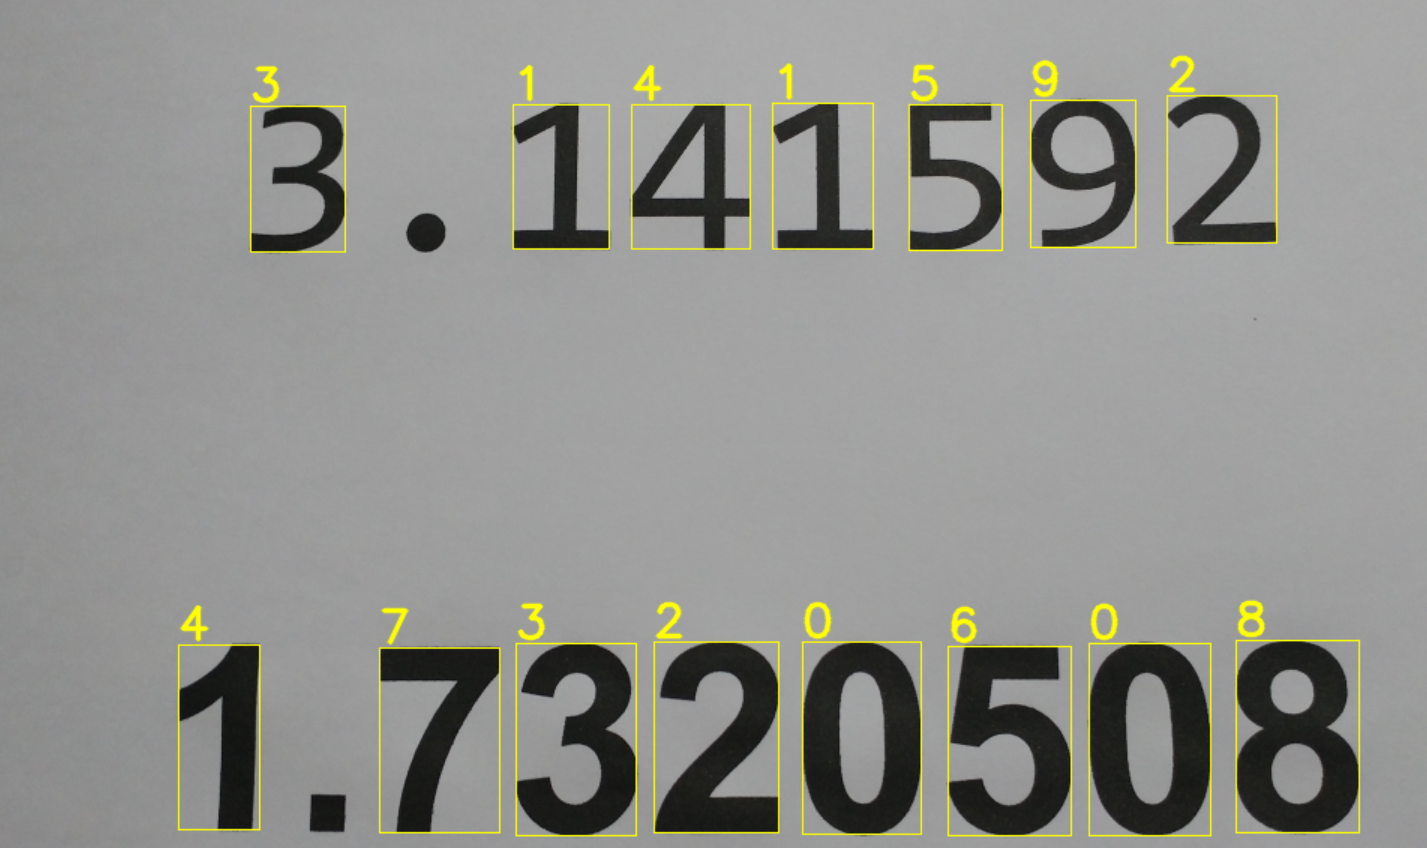